# Fazendo somente com a área do imovel

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Leitura dos dados
dataset = pd.read_csv('Housing.csv')

# Mapeamento das strings para valores numéricos
mapping = {'yes': 1, 'no': 0, 'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}

dataset['mainroad'] = dataset['mainroad'].map(mapping)
dataset['guestroom'] = dataset['guestroom'].map(mapping)
dataset['basement'] = dataset['basement'].map(mapping)
dataset['hotwaterheating'] = dataset['hotwaterheating'].map(mapping)
dataset['airconditioning'] = dataset['airconditioning'].map(mapping)
dataset['prefarea'] = dataset['prefarea'].map(mapping)
dataset['furnishingstatus'] = dataset['furnishingstatus'].map(mapping)

# Divisão dos dados
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Separando rótulos das características
train_labels = train_features.pop('area')
test_labels = test_features.pop('area')

# Conversão de colunas categóricas restantes em dummies (one-hot encoding)
non_numeric_columns = train_features.select_dtypes(include=['object']).columns
train_features = pd.get_dummies(train_features, columns=non_numeric_columns)
test_features = pd.get_dummies(test_features, columns=non_numeric_columns)

# Alinhando as features para garantir que ambas tenham as mesmas colunas
train_features, test_features = train_features.align(test_features, join='left', axis=1, fill_value=0)

# Normalização das características
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

# Função para construir o modelo
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

# Ajuste do normalizador de características
normalizer.adapt(np.array(train_features))

# Construção e compilação do modelo
dnn_area_model = build_and_compile_model(normalizer)
dnn_area_model.summary()

# Conversão das características e rótulos para numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

history = dnn_area_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100
)

dnn_area_model.save('dnn_model.keras')

"""Se você recarregar o modelo, ele gerará uma saída idêntica:"""

reloaded = tf.keras.models.load_model('dnn_model_area.keras')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (436, 12)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (104.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 25 (104.00 B)

ValueError: File not found: filepath=dnn_model_area.keras. Please ensure the file is an accessible `.keras` zip file.

# Fazendo com outras features

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Leitura dos dados
dataset = pd.read_csv('Housing.csv')

# Mapeamento das strings para valores numéricos
mapping = {'yes': 1, 'no': 0, 'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}

dataset['mainroad'] = dataset['mainroad'].map(mapping)
dataset['guestroom'] = dataset['guestroom'].map(mapping)
dataset['basement'] = dataset['basement'].map(mapping)
dataset['hotwaterheating'] = dataset['hotwaterheating'].map(mapping)
dataset['airconditioning'] = dataset['airconditioning'].map(mapping)
dataset['prefarea'] = dataset['prefarea'].map(mapping)
dataset['furnishingstatus'] = dataset['furnishingstatus'].map(mapping)

# Divisão dos dados
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Separando rótulos das características
train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

# Conversão de colunas categóricas restantes em dummies (one-hot encoding)
non_numeric_columns = train_features.select_dtypes(include=['object']).columns
train_features = pd.get_dummies(train_features, columns=non_numeric_columns)
test_features = pd.get_dummies(test_features, columns=non_numeric_columns)

# Alinhando as features para garantir que ambas tenham as mesmas colunas
train_features, test_features = train_features.align(test_features, join='left', axis=1, fill_value=0)

# Normalização das características
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

# Função para construir o modelo
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

# Construção e compilação do modelo
dnn_price_model = build_and_compile_model(normalizer)
dnn_price_model.summary()

# Conversão das características e rótulos para numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

history = dnn_price_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100
)

dnn_price_model.save('dnn_model_price.keras')

reloaded_price_model = tf.keras.models.load_model('dnn_model_price.keras')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (436, 12)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (104.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 25 (104.00 B)

# Plotando loss e curva do modelo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


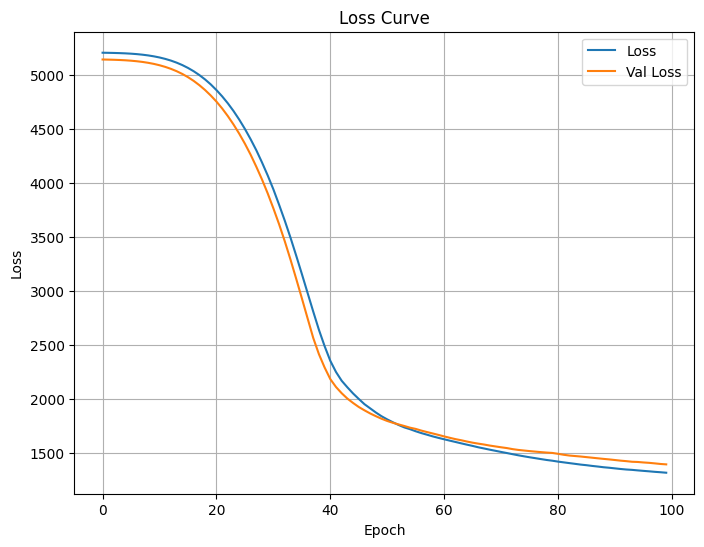

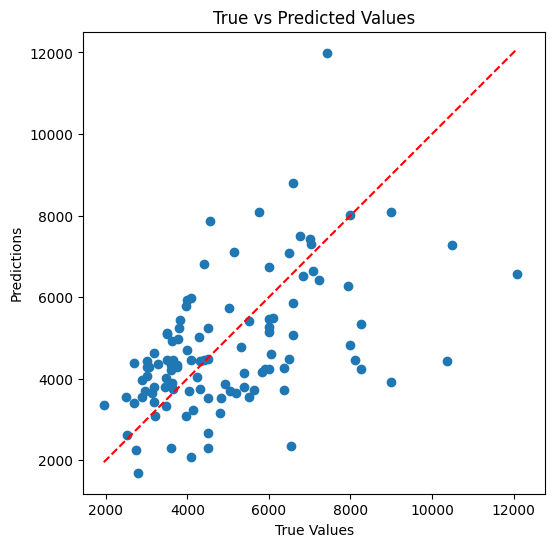

In [13]:
import matplotlib.pyplot as plt

# Função para plotar o histórico de perda
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.title('Loss Curve')
    plt.show()

# Prevendo os valores no conjunto de teste
test_predictions = dnn_area_model.predict(test_features).flatten()

# Função para plotar os valores reais versus preditos
def plot_real_vs_pred(predictions, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(labels, predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([min(labels), max(labels)], [min(labels), max(labels)], color='red', linestyle='--')
    plt.title('True vs Predicted Values')
    plt.show()

# Plotando o histórico de perda
plot_loss(history)

# Plotando os valores reais versus preditos
plot_real_vs_pred(test_predictions, test_labels)


# Sobre o método e o desempenho

Foi feito:
1) Preparação dos dados (mapeamento e OneHotEncoding) e separação em treino e teste
2) Normalização dos dados
3) Criação do modelo: Camadas densas com ativação ReLU e função de ativação linear, com otimizador Adam e loss MSE
4) Treinamento do modelo: Histórico de loss e curva de aprendizado

Pode ser observado que o modelo não está performando bem quando feito com a feature 'price', com um loss alto e uma curva de aprendizado que não converge. Isso pode ser devido a:
1) Poucas features: O modelo pode estar subajustando, pois não tem muitas features para aprender
2) Mapeamento: O mapeamento das features pode não ser o ideal

Mas, ao fazer o modelo com a feature 'area', o modelo performa bem, com um loss baixo e uma curva de aprendizado que converge.

![Captura de tela 2024-07-26 110654.png](<attachment:Captura de tela 2024-07-26 110654.png>) 

![Captura de tela 2024-07-26 110717.png](<attachment:Captura de tela 2024-07-26 110717.png>)

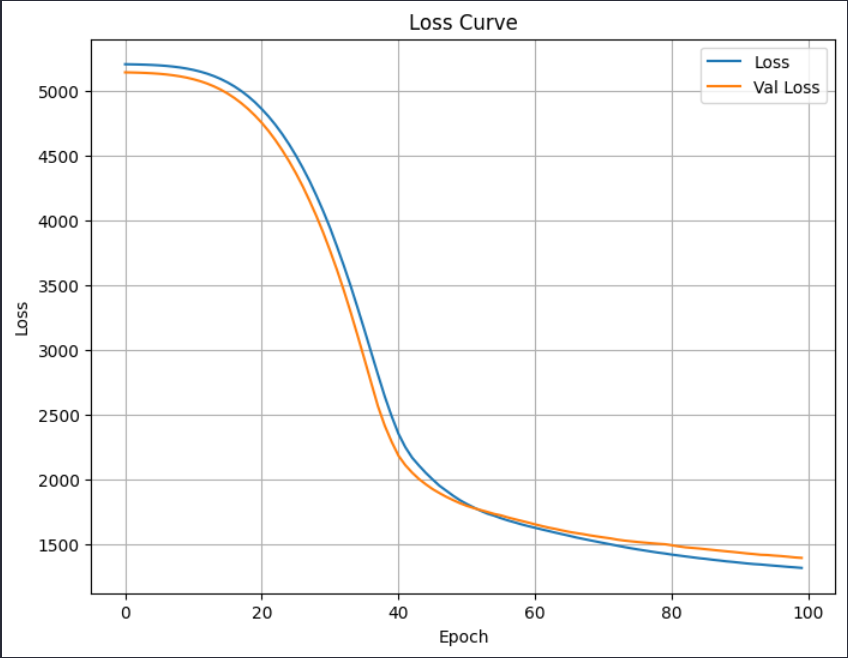
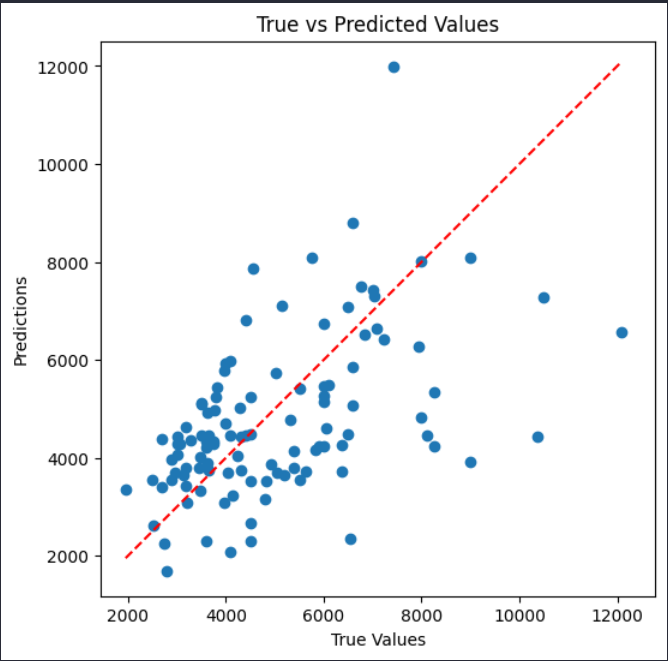